
# Build a Model that Classifies the Side Effects of a Drug


## Importing Standard Libraries

In [1]:
from faker import Faker
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Creating columns with Faker

In [3]:
fake = Faker()

In [5]:
genders = []
for _ in range(400000):
    genders.append(fake.random_element(elements=('M', 'F')))
gender = pd.DataFrame({'Gender': genders})

In [6]:
names = []
for _ in range(400000):
    names.append(fake.name())

name = pd.DataFrame({'Name': names})

In [7]:
races = []
for _ in range(400000):
    races.append(fake.random_element(elements=('White', 'Black', 'Asian', 'Hispanic', 'Other')))

race = pd.DataFrame({'Race': races})

In [8]:
import random
ages = []
for _ in range(400000):
    age = random.randint(10, 99)
    ages.append(age)

age = pd.DataFrame({'Age': ages})

In [9]:
fake_data = pd.concat([name,race,gender,age], axis=1).reindex(race.index)

In [10]:
fake_data.head()

,Name,Race,Gender,Age
0,Madison Campbell,Black,M,23
1,Nicole Clarke,Other,M,67
2,Jesus Martin,Other,M,36
3,Blake Young,White,F,15
4,David Pratt,Hispanic,F,84


In [11]:
fake_data = pd.concat([name,race,gender,age], axis=1).reindex(race.index)

In [12]:
fake_data.head()

,Name,Race,Gender,Age
0,Madison Campbell,Black,M,23
1,Nicole Clarke,Other,M,67
2,Jesus Martin,Other,M,36
3,Blake Young,White,F,15
4,David Pratt,Hispanic,F,84


In [13]:
df = pd.read_csv('drug_effects (1).csv')
df.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,condition,sideEffects
0,0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects
1,1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects
2,2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects
3,3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects
4,4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects


In [14]:
df.shape

(3107, 6)

In [15]:
df2 = pd.concat([df]*130, ignore_index=True)
df2 = df2.iloc[0:400000]

In [16]:
df2.shape

(400000, 6)

## Creating the Final Dataset

In [17]:
data = pd.concat([df2,fake_data],axis=1)
data.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,condition,sideEffects,Name,Race,Gender,Age
0,0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects,Madison Campbell,Black,M,23
1,1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects,Nicole Clarke,Other,M,67
2,2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects,Jesus Martin,Other,M,36
3,3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects,Blake Young,White,F,15
4,4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects,David Pratt,Hispanic,F,84


In [18]:
data.shape

(400000, 10)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     400000 non-null  int64 
 1   urlDrugName    400000 non-null  object
 2   rating         400000 non-null  int64 
 3   effectiveness  400000 non-null  object
 4   condition      399872 non-null  object
 5   sideEffects    400000 non-null  object
 6   Name           400000 non-null  object
 7   Race           400000 non-null  object
 8   Gender         400000 non-null  object
 9   Age            400000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 30.5+ MB


In [20]:
data.describe()

,Unnamed: 0,rating,Age
count,400000.000000,400000.00000,400000.000000
mean,1550.687360,7.00626,54.521875
std,896.266461,2.93698,25.991230
min,0.000000,1.00000,10.000000
25%,775.000000,5.00000,32.000000
50%,1550.000000,8.00000,55.000000
75%,2325.000000,9.00000,77.000000
max,3106.000000,10.00000,99.000000


In [21]:
data.isna().sum()

Unnamed: 0         0
urlDrugName        0
rating             0
effectiveness      0
condition        128
sideEffects        0
Name               0
Race               0
Gender             0
Age                0
dtype: int64

## Exploratory Data Analysis

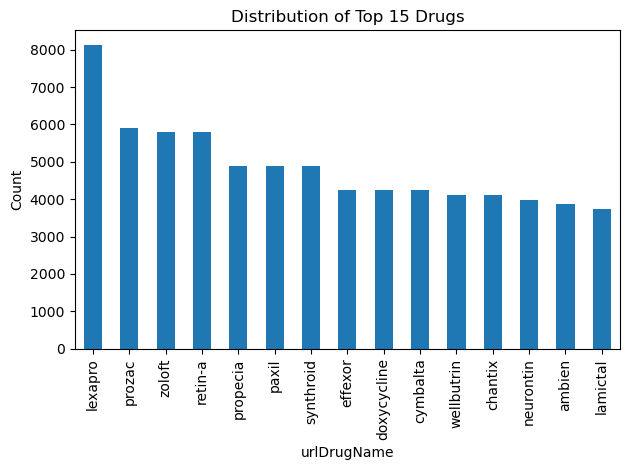

In [25]:
drugs_counts = data['urlDrugName'].value_counts().head(15)
drugs_counts.plot(kind='bar')
plt.title('Distribution of Top 15 Drugs')
plt.xlabel('urlDrugName')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

- Lexapro emerges as the most frequently used drug, followed by Prozac. Notably, all top 15 drugs in the dataset has been used by more than atleast 3000 people.

In [26]:
# To find the percentage of ratings
ratings_per = data['rating'].value_counts().sort_values(ascending=False).reset_index().\
                    rename(columns = {'index' :'rating', 'rating' : 'counts'})
ratings_per['percent'] = 100 * (ratings_per['counts']/data.shape[0])
ratings_per

,rating,counts,percent
0,10,95519,23.87975
1,8,71846,17.96150
2,9,61803,15.45075
3,7,45068,11.26700
4,1,39261,9.81525
5,5,20469,5.11725
6,6,20206,5.05150
7,3,18799,4.69975
8,4,13773,3.44325
9,2,13256,3.31400


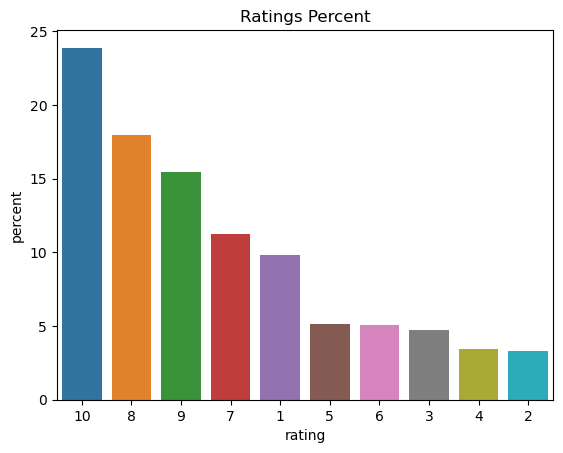

In [27]:
sns.barplot(x = ratings_per['rating'], y = ratings_per['percent'],order = ratings_per['rating'])
plt.title('Ratings Percent')
plt.show()

- It is notable that a substancial proportion of patients exceeding 23%, rated there medicine with the highest possible score of 10.

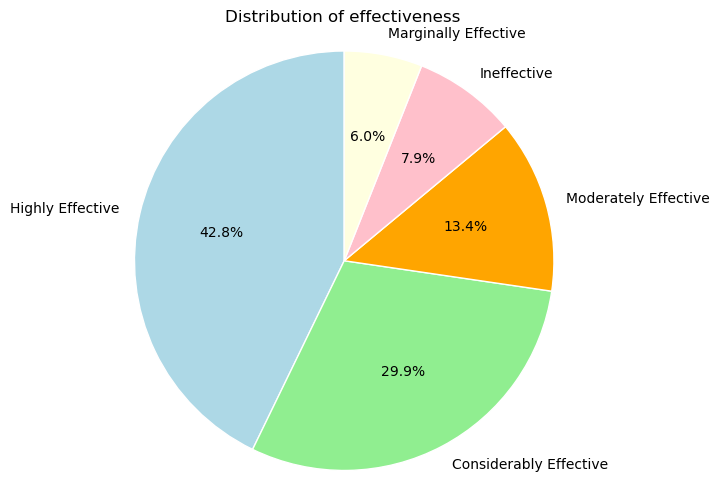

In [28]:
side_effect_counts = data['effectiveness'].value_counts()
colors = ['lightblue', 'lightgreen', 'orange', 'pink', 'lightyellow']
plt.figure(figsize=(8, 6))
plt.pie(side_effect_counts, labels=side_effect_counts.index,colors=colors, autopct='%1.1f%%',startangle=90, wedgeprops={'edgecolor': 'white'})
plt.title('Distribution of effectiveness')
plt.axis('equal')
plt.show()

- The pie chart reveals that 42.8% of patients perceived the prescribed medicines as highly effective. The remaining percentage reflects varying degrees of ineffectiveness, ranging from considerably to marginally, moderately and ineffective.

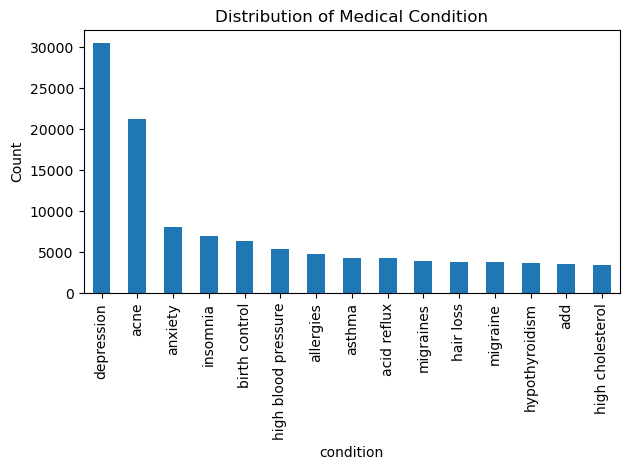

In [29]:
condition_counts = data['condition'].value_counts().head(15)
condition_counts.plot(kind='bar')
plt.title('Distribution of Medical Condition')
plt.xlabel('condition')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

- The dataset indicates a higher proportion of patients with mental illnesses compared to those with physical conditions.

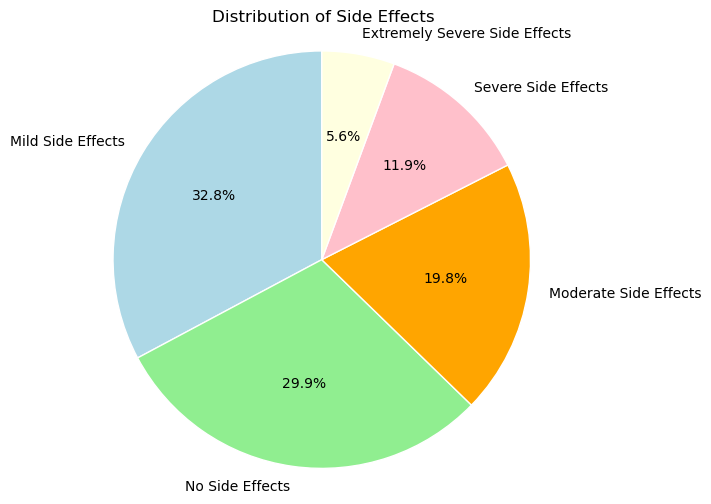

In [30]:
side_effect_counts = data['sideEffects'].value_counts()
colors = ['lightblue', 'lightgreen', 'orange', 'pink', 'lightyellow']
plt.figure(figsize=(8, 6))
plt.pie(side_effect_counts, labels=side_effect_counts.index,colors=colors, autopct='%1.1f%%',startangle=90, wedgeprops={'edgecolor': 'white'})
plt.title('Distribution of Side Effects')
plt.axis('equal')
plt.show()

- The pie chart highlights that only 29.9% of the patients did not experience any side effects, while the majority encountered a spectrum of side effects ranging from mild to extremely severe.

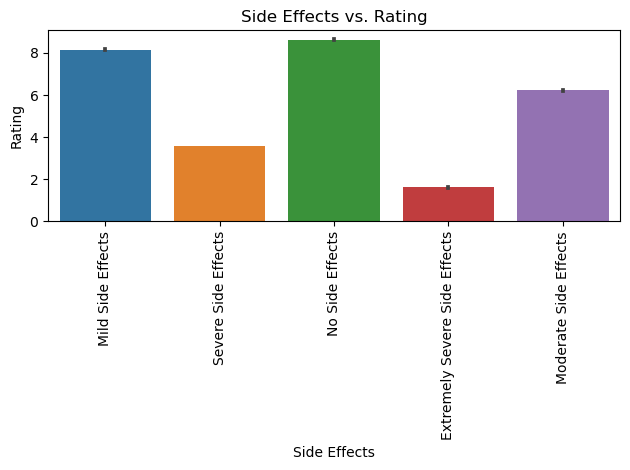

In [31]:
sns.barplot(x='sideEffects', y='rating', data=data)

plt.title('Side Effects vs. Rating')
plt.xlabel('Side Effects')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- This visualization clearly demonstrates a notable trend: medicines with lower ratings are associated with a higher occurrence of extremely severe side effects.

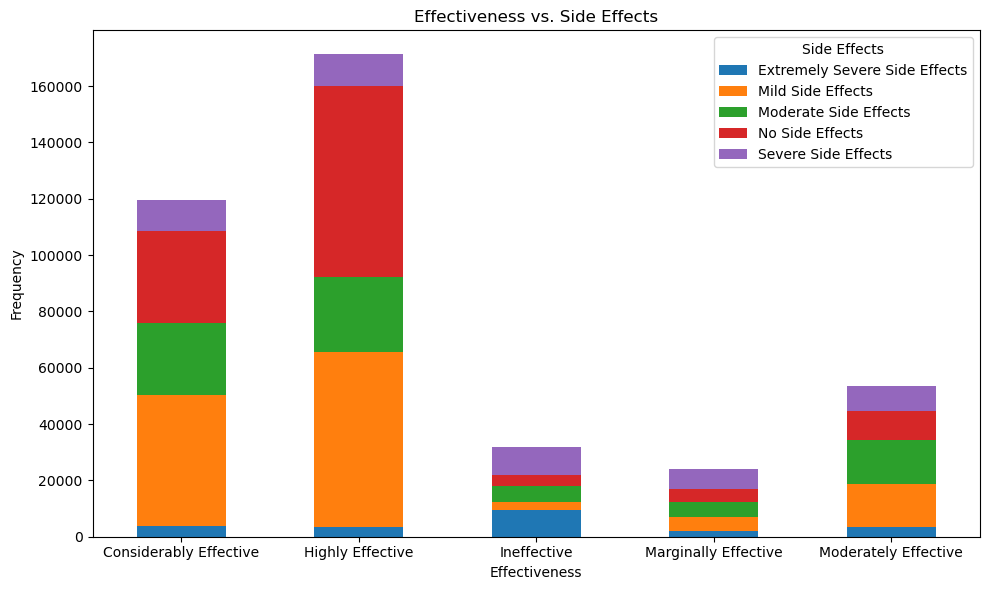

In [32]:
# Calculate the frequency of side effects by effectiveness
side_effects_counts = data.groupby(['effectiveness', 'sideEffects']).size().unstack()

side_effects_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Effectiveness vs. Side Effects')
plt.xlabel('Effectiveness')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Side Effects', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

- The graph highlights an interesting observation that even highly effective medicines can still exhibit side effects.

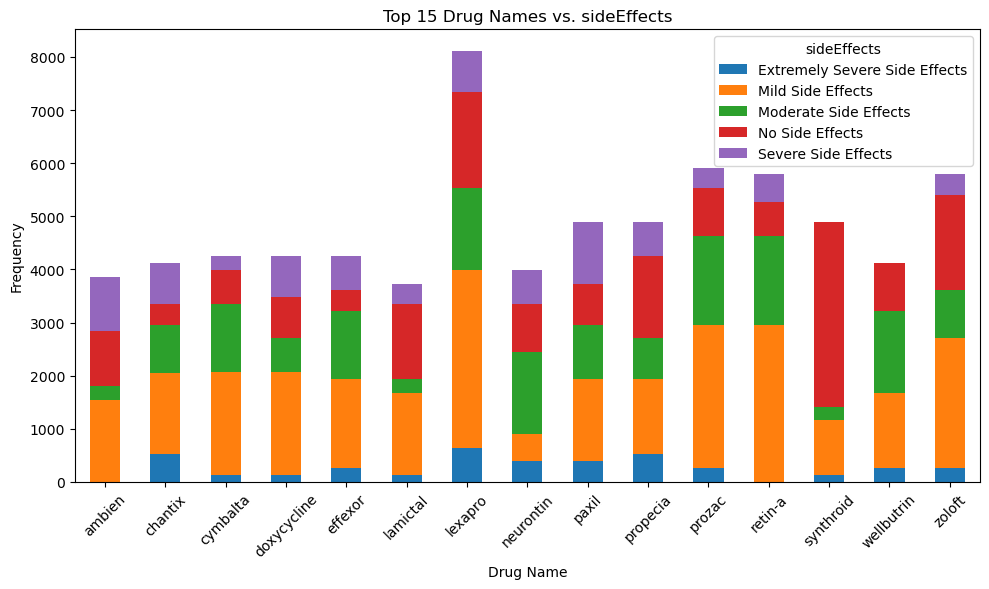

In [33]:
top_drug_names = data['urlDrugName'].value_counts().nlargest(15).index

filtered_data = data[data['urlDrugName'].isin(top_drug_names)]

effectiveness_counts = filtered_data.groupby(['urlDrugName', 'sideEffects']).size().unstack()

effectiveness_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Top 15 Drug Names vs. sideEffects')
plt.xlabel('Drug Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='sideEffects', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

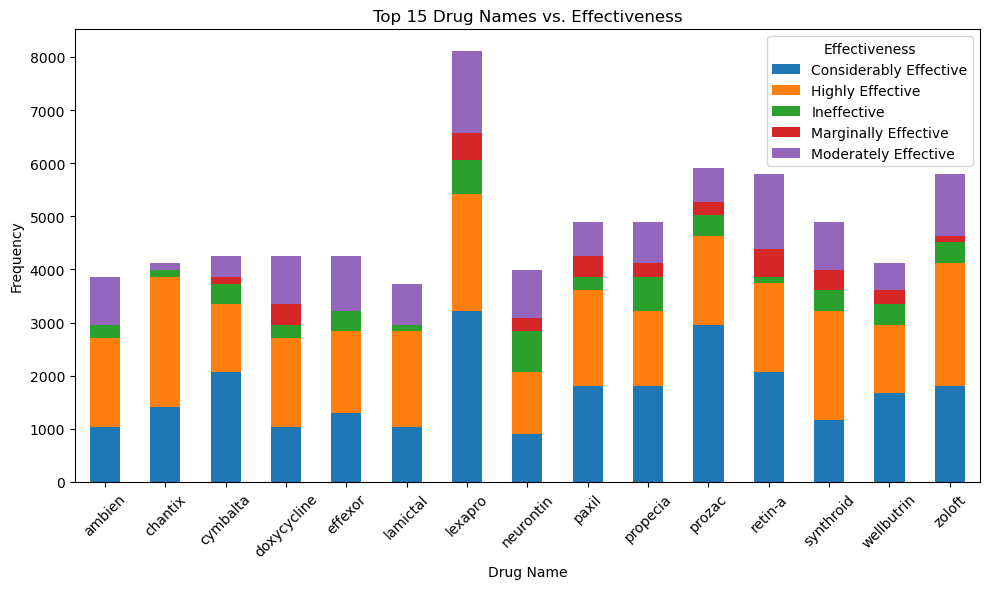

In [34]:
top_drug_names = data['urlDrugName'].value_counts().nlargest(15).index

filtered_data = data[data['urlDrugName'].isin(top_drug_names)]

effectiveness_counts = filtered_data.groupby(['urlDrugName', 'effectiveness']).size().unstack()

effectiveness_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Top 15 Drug Names vs. Effectiveness')
plt.xlabel('Drug Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Effectiveness', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


## Data pre-processing

### Feature Reduction

In [24]:
data=data.drop(['Name','Unnamed: 0'],axis=1) #We can drop Name and Unnamed: 0 columns as they dont influence the side effects

### Handling Missing values

In [21]:
data.isna().sum()

Unnamed: 0         0
urlDrugName        0
rating             0
effectiveness      0
condition        128
sideEffects        0
Name               0
Race               0
Gender             0
Age                0
dtype: int64

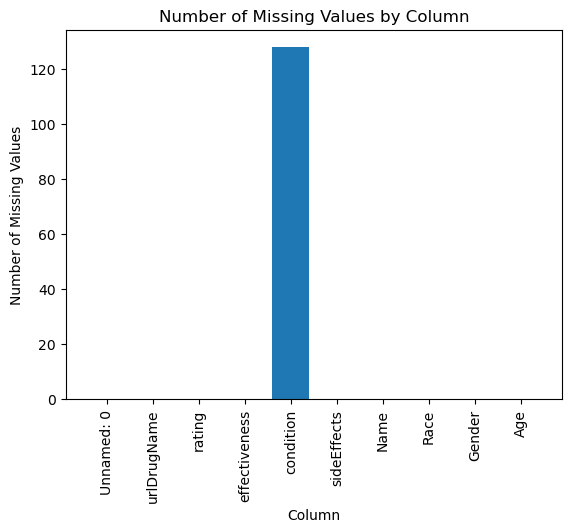

In [22]:
null_counts = data.isna().sum()
plt.bar(null_counts.index, null_counts.values)
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.title('Number of Missing Values by Column')
plt.xticks(rotation=90)
plt.show()

In [23]:
data['condition'] = data['condition'].fillna(data['condition'].mode()[0])

### Feature Engineering

In [35]:
labels=['Child','Teen','Aduld','Middle Age Adult','Senior Adult']
bins= [9,13,20,40,60,100]
data['Age_Group'] = pd.cut(data['Age'],bins=bins,labels=labels)

In [36]:
data.head()

,urlDrugName,rating,effectiveness,condition,sideEffects,Race,Gender,Age,Age_Group
0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects,Black,M,23,Aduld
1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects,Other,M,67,Senior Adult
2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects,Other,M,36,Aduld
3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects,White,F,15,Teen
4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects,Hispanic,F,84,Senior Adult


In [37]:
data['Age_Group'].value_counts()

Senior Adult        173732
Aduld                88647
Middle Age Adult     88552
Teen                 31356
Child                17713
Name: Age_Group, dtype: int64

<AxesSubplot:xlabel='Age_Group', ylabel='count'>

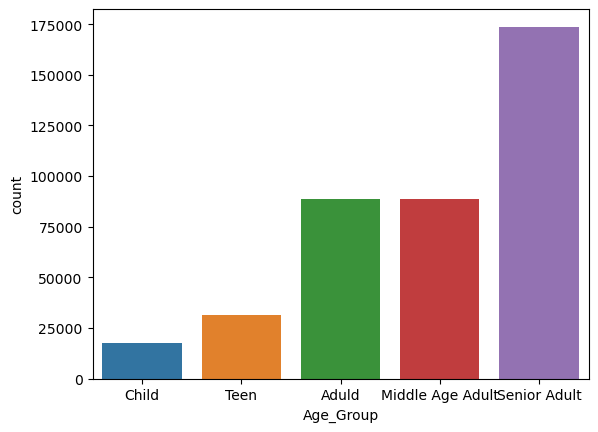

In [38]:
sns.countplot(x=data['Age_Group'])

- The dataset contains a larger proportion of senior adults compared to other age groups.

### Label Encoding

In [39]:
# Encoding the categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['urlDrugName','effectiveness','condition','Gender','Race','Age_Group']:
    data[col]=le.fit_transform(data[col])

In [40]:
data.head()

,urlDrugName,rating,effectiveness,condition,sideEffects,Race,Gender,Age,Age_Group
0,166,4,1,797,Mild Side Effects,1,1,23,0
1,319,1,1,224,Severe Side Effects,3,1,67,3
2,345,10,1,819,No Side Effects,3,1,36,0
3,353,3,3,11,Mild Side Effects,4,0,15,4
4,259,2,3,492,Severe Side Effects,2,0,84,3


### Correlation Matrix

<AxesSubplot:>

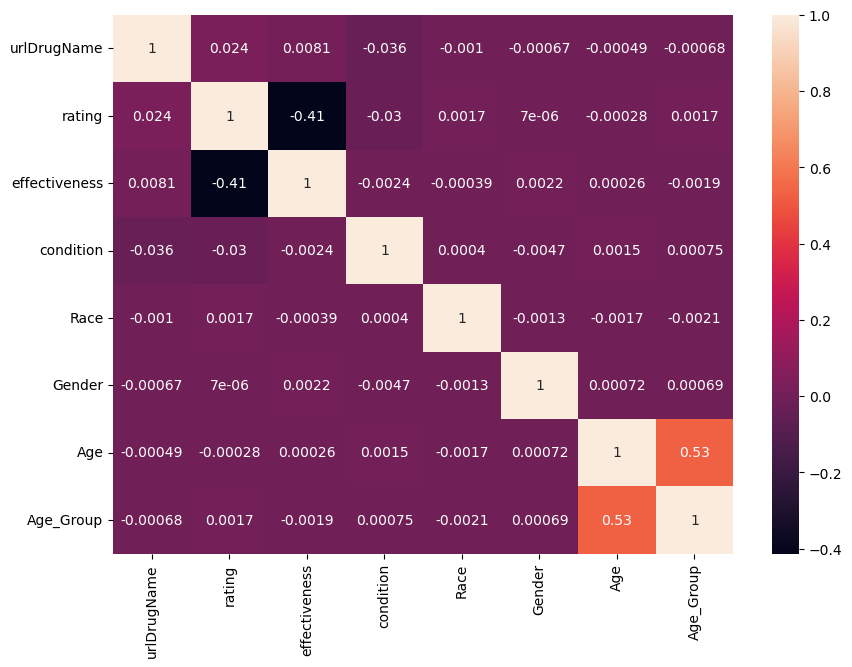

In [41]:
#Lets see the correlation
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)

- We can't drop any column. Because the dataset does'nt have any highly correlated features

## Splitting the data

In [42]:
y=data['sideEffects']
X=data.drop(['sideEffects'],axis=1)

### Scaling

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X)

array([[-0.70293662, -1.02359009, -0.22940703, ...,  0.99928026,
        -1.21279039, -1.62882777],
       [ 0.33634101, -2.04504873, -0.22940703, ...,  0.99928026,
         0.48009041,  0.69409519],
       [ 0.51295028,  1.0193272 , -0.22940703, ...,  0.99928026,
        -0.71262106, -1.62882777],
       ...,
       [-0.0983895 ,  0.33835477, -0.98975052, ...,  0.99928026,
         1.51890363,  0.69409519],
       [ 1.07674142, -0.00213144,  2.05162342, ...,  0.99928026,
        -1.63601059, -0.85452012],
       [-1.48409301,  0.33835477, -0.22940703, ...,  0.99928026,
        -0.59719737, -1.62882777]])

In [44]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
urlDrugName,400000.0,269.484670,147.217823,0.0,147.0,280.0,391.0,501.0
rating,400000.0,7.006260,2.936980,1.0,5.0,8.0,9.0,10.0
effectiveness,400000.0,1.301715,1.315197,0.0,0.0,1.0,2.0,4.0
condition,400000.0,608.441632,424.172733,0.0,236.0,561.0,951.0,1425.0
Race,400000.0,1.997437,1.414325,0.0,1.0,2.0,3.0,4.0
Gender,400000.0,0.500360,0.500000,0.0,0.0,1.0,1.0,1.0
Age,400000.0,54.521875,25.991230,10.0,32.0,55.0,77.0,99.0
Age_Group,400000.0,2.103592,1.291478,0.0,1.0,3.0,3.0,4.0


## Splitting the dataset into train and test sets

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

## Modelling

### 1. Logistic Regression Model

In [46]:
from sklearn.linear_model import LogisticRegression

model1=LogisticRegression()
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)

In [47]:
print('Accuracy on Logistic Regression is : ',accuracy_score(y_test,y_pred1))
print('precision is : ',precision_score(y_test,y_pred1,average='macro'))
print('recall is : ',recall_score(y_test,y_pred1,average='macro'))
print('f1 score is : ',f1_score(y_test,y_pred1,average='macro'))

Accuracy on Logistic Regression is :  0.3981375
precision is :  0.42787334495979906
recall is :  0.3104825394270348
f1 score is :  0.306467459857841


In [48]:
confusion_matrix(y_test,y_pred1)

array([[   18,   165,  1470,   149,  2656],
       [    0, 15184,  2131,  8623,   303],
       [    5,  6508,  4521,  3777,  1037],
       [    0, 12304,  1785,  9331,   566],
       [    7,  1902,  3817,   944,  2797]], dtype=int64)

In [49]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [50]:
cv_log=cross_val_score(model1,X,y,cv=5)
cv_log
cv_log.mean()

0.38075749999999997

In [51]:
from sklearn.model_selection import KFold,StratifiedKFold

In [52]:
cv_logs = KFold(random_state=42, shuffle=True)
scores = cross_val_score(model1, X, y, scoring='f1_macro', cv=cv_logs, n_jobs=-1)
scores.mean()

0.29545980392128646

In [53]:
cv_lo=StratifiedKFold(random_state=42, shuffle=True)
scores = cross_val_score(model1, X, y, scoring='f1_macro', cv=cv_lo, n_jobs=-1)
scores.mean()

0.2963017595530668

### 2. KNN Model

In [54]:
from sklearn.neighbors import KNeighborsClassifier
#find optimum k- value.We have to create model with varied k values
acc_values=[]
neighbors=np.arange(3,18) #taking values 3 to 15 into a variable

#loop to ceate KNN model for each k-value
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k,metric='minkowski')#instance of KNN to variable
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    #append accuracy values to acc_values to find out the maximum accuracy
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [55]:
acc_values

[0.90155,
 0.893125,
 0.890875,
 0.885025,
 0.883975,
 0.8789125,
 0.8770875,
 0.87155,
 0.8699875,
 0.8639875,
 0.8623875,
 0.8581125,
 0.8559,
 0.84985,
 0.8472]

###### To find which k value got the highest accuracy, plotted a graph between neighbor values (i.e. k values) and accuracy values

Text(0, 0.5, 'Accuracy')

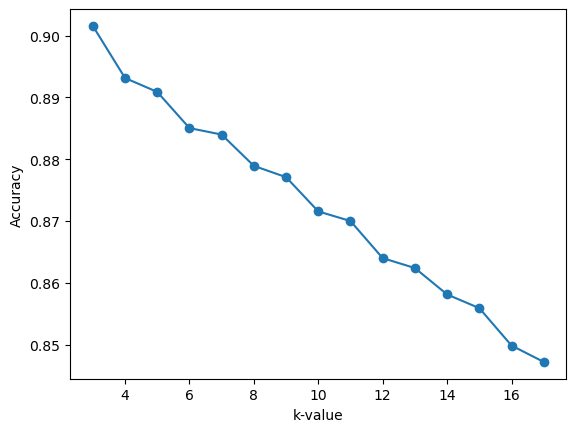

In [56]:
#find correspomd k value corresponding to highest accuracy
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k-value')
plt.ylabel('Accuracy')

In [57]:
#Make a model with k as 16
model2=KNeighborsClassifier(n_neighbors=3,metric='minkowski')#instance of KNN to variable
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)

In [58]:
print('Accuracy on KNN is : ',accuracy_score(y_test,y_pred2))
print('precision is : ',precision_score(y_test,y_pred2,average='macro'))
print('recall is : ',recall_score(y_test,y_pred2,average='macro'))
print('f1 score is : ',f1_score(y_test,y_pred2,average='macro'))

Accuracy on KNN is :  0.90155
precision is :  0.9050911781099463
recall is :  0.8993135938777673
f1 score is :  0.9020863767142263


In [59]:
confusion_matrix(y_test,y_pred2)

array([[ 4008,    40,   101,    59,   250],
       [   49, 23778,   822,  1408,   184],
       [   93,  1265, 13946,   302,   242],
       [   47,  1709,   274, 21879,    77],
       [  235,   373,   269,    77,  8513]], dtype=int64)

In [60]:
cv_knn=cross_val_score(model2,X,y,cv=5)
cv_knn
cv_knn.mean()

0.9019550000000001

In [61]:
cv_knn = KFold(random_state=42, shuffle=True)
scores = cross_val_score(model2, X, y, scoring='f1_macro', cv=cv_knn, n_jobs=-1)
scores.mean()

0.9026126163672792

In [62]:
cv_knn=StratifiedKFold(random_state=42, shuffle=True)
scores = cross_val_score(model2, X, y, scoring='f1_macro', cv=cv_knn, n_jobs=-1)
scores.mean()

0.9020522396750064

### 3. Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(X_train,y_train)
y_pred3=model3.predict(X_test)

In [64]:
print('Accuracy on Random Forest is : ',accuracy_score(y_test,y_pred3))
print('f1 score is : ',f1_score(y_test,y_pred3,average='macro'))
print('precision is : ',precision_score(y_test,y_pred3,average='macro'))
print('recall is : ',recall_score(y_test,y_pred3,average='macro'))

Accuracy on Random Forest is :  0.9348
f1 score is :  0.9406604140534702
precision is :  0.9416841168701684
recall is :  0.9397358434818714


In [65]:
confusion_matrix(y_test,y_pred3)

array([[ 4274,    16,     6,    23,   139],
       [   18, 24295,   479,  1347,   102],
       [   26,   815, 14689,   202,   116],
       [   31,  1204,   134, 22566,    51],
       [  145,   190,   126,    46,  8960]], dtype=int64)

In [66]:
cv_rf=cross_val_score(model3,X,y,cv=5)
cv_rf
cv_rf.mean()

0.9371925000000001

In [67]:
cv_rf = KFold(random_state=42, shuffle=True)
scores = cross_val_score(model3, X, y, scoring='f1_macro', cv=cv_rf, n_jobs=-1)
scores.mean()

0.9407361526182692

In [68]:
cv_rf=StratifiedKFold(random_state=42, shuffle=True)
scores = cross_val_score(model3, X, y, scoring='f1_macro', cv=cv_rf, n_jobs=-1)
scores.mean()

0.9411955579013178

### 4. Decision Tree Classifier

In [69]:
from sklearn.tree import DecisionTreeClassifier
model4=DecisionTreeClassifier()
model4.fit(X_train,y_train)
y_pred4=model4.predict(X_test)

In [70]:
print('Accuracy on Decision Tree is:',accuracy_score(y_test,y_pred4))
print('Precesion score is:',precision_score(y_test,y_pred4,average='macro'))
print('recall_score is:',recall_score(y_test,y_pred4,average='macro'))
print('F1 score is:',f1_score(y_test,y_pred4,average='macro'))

Accuracy on Decision Tree is: 0.95435
Precesion score is: 0.9563376622269969
recall_score is: 0.9562819116506172
F1 score is: 0.956303981772223


In [71]:
confusion_matrix(y_test,y_pred4)

array([[ 4286,    13,     8,    20,   131],
       [   16, 24906,   409,   800,   110],
       [   14,   470, 15176,    83,   105],
       [   17,   919,    97, 22909,    44],
       [  138,   136,    93,    29,  9071]], dtype=int64)

In [72]:
cv_dt=cross_val_score(model4,X,y,cv=5)
cv_dt

array([0.95375  , 0.9532875, 0.9536375, 0.9543875, 0.95365  ])

In [73]:
cv_dt = KFold(random_state=42, shuffle=True)
scores = cross_val_score(model4, X, y, scoring='f1_macro', cv=cv_dt, n_jobs=-1)
scores.mean()

0.9558085897066106

In [74]:
cv_dt = StratifiedKFold(random_state=42, shuffle=True)
scores = cross_val_score(model4, X, y, scoring='f1_macro', cv=cv_dt, n_jobs=-1)
scores.mean()

0.9557402312966883

### 5. SVM

In [74]:
from sklearn.svm import SVC
model5=SVC()
model5.fit(X_train,y_train)
y_pred5=model5.predict(X_test)

In [75]:
print('Accuracy on SVM is:',accuracy_score(y_test,y_pred5))
print('Precesion score is:',precision_score(y_test,y_pred5,average='macro'))
print('recall_score is:',recall_score(y_test,y_pred5,average='macro'))
print('F1 score is:',f1_score(y_test,y_pred5,average='macro'))

Accuracy on SVM is: 0.37385
Precesion score is: 0.28743623405980545
recall_score is: 0.25044295678733375
F1 score is: 0.22776272147415963


### 6. Gradient Boosting

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
model6 = GradientBoostingClassifier()
model6.fit(X_train,y_train)
y_pred6 = model6.predict(X_test)

In [76]:
print('Accuracy on GradientBoostingClassifier is:',accuracy_score(y_test,y_pred6))
print('Precesion score is:',precision_score(y_test,y_pred6,average='macro'))
print('recall_score is:',recall_score(y_test,y_pred6,average='macro'))
print('F1 score is:',f1_score(y_test,y_pred6,average='macro'))

Accuracy on GradientBoostingClassifier is: 0.6323125
Precesion score is: 0.6355803546385441
recall_score is: 0.6400879984611532
F1 score is: 0.6340149946197661


## Conclusion

This project involved cleaning and analyzing the dataset on drug usage and its side effects. The Decision tree classifier performed best in predicting drug usage patterns with 95.55% accuracy. Senior adults aged 60-100 used the drug the most, and users generally found it highly effective. Individual differences in drug side effects were noted, influenced by their bodies and race. The findings offer valuable insights into drug consumption trends and can help optimize treatments for diverse patient populations, contributing to better healthcare outcomes. 